In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split

## Data

In [5]:
# data = pd.read_csv("/Users/ben/Documents/GitHub/AdvancedMachineLearning/Data/WineData/cleansingWine.csv", low_memory=False)
data = pd.read_csv("/Users/Bnkes/Desktop/GitHub/AdvancedMachineLearning/Data/WineData/cleansingWine.csv", low_memory=False)
data = data.drop("Unnamed: 0", axis = 1)
data.head()

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,Cinsault,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,Ugni​ blanc,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,NaN,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750


In [7]:
def remove_tilda(value):
    if "~" in value:
        values = value.split("~")
        avg = (float(value[0]) + float(value[-1]))/2
        return avg
    else:
        return float(value)

In [9]:
clean_data = data.drop(
    ["id", "name", "producer", "local3", "local4", "varieties2",
     "varieties3", "varieties4", "varieties5", "varieties6", "varieties7",
     "varieties8", "varieties9", "varieties10", "varieties11", "varieties12"], axis = 1)
clean_data = clean_data[(clean_data["price"] != 0) & (clean_data["year"] != 0)]
clean_data = clean_data.dropna(axis = 0)
clean_data["year"] = clean_data["year"].astype(str)
clean_data["abv"] = clean_data["abv"].apply(lambda x: remove_tilda(x))
clean_data["degree"] = clean_data["degree"].apply(lambda x: remove_tilda(x))
clean_data.reset_index(inplace=True, drop=True)
clean_data

,nation,local1,local2,varieties1,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,France,Southern France,Languedoc Roussillon,Cabernet Sauvignon,Red,Table,2.5,4.5,SWEET1,ACIDITY3,BODY2,TANNIN3,19000,2017,750
1,France,Southern France,Languedoc Roussillon,Merlot,Red,Table,2.5,4.5,SWEET1,ACIDITY3,BODY3,TANNIN3,19000,2011,750
2,France,Bordeaux,Premieres Cotes de Bordeaux,Semillon,White,Dessert,13.0,1.5,SWEET2,ACIDITY4,BODY3,TANNIN1,18000,2009,750
3,France,Bordeaux,Medoc,Cabernet Sauvignon,Red,Table,2.0,4.5,SWEET1,ACIDITY4,BODY3,TANNIN3,32000,2015,750
4,France,Bordeaux,SaintEmilion,Merlot,Red,Table,2.0,4.5,SWEET1,ACIDITY3,BODY2,TANNIN2,42000,2010,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,Italy,Toscana,Bolgheri,Cabernet Sauvignon,Red,Table,2.5,4.5,SWEET1,ACIDITY3,BODY3,TANNIN3,250000,2007,750
4017,USA,California,Riverside County,Sangiovese,Rose,"Appetizer, Table",2.5,4.0,SWEET2,ACIDITY3,BODY2,TANNIN1,195000,2013,750
4018,USA,California,Napa County,Cabernet Sauvignon,Red,Table,3.0,4.5,SWEET1,ACIDITY3,BODY4,TANNIN4,475000,2006,750
4019,the Republic of South Africa,Coastal Region,Paarl,Chardonnay,White,"Appetizer, Table",2.0,1.5,SWEET1,ACIDITY3,BODY2,TANNIN1,40000,2020,750


In [11]:
ct = ColumnTransformer(
    [
        ("dummify", preprocessing.OneHotEncoder(sparse_output=False, handle_unknown="error", drop = "first"), make_column_selector(dtype_include=object)),
        ("standardize", preprocessing.StandardScaler(), make_column_selector(dtype_include=np.number))
    ], remainder = "passthrough"
)

## Neural Networks

### Regression Model

In [13]:
X = clean_data.drop("price", axis = 1)
X = ct.fit_transform(X)
y = clean_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.25, random_state=1)

In [159]:
#construct the model
inputs = keras.Input(shape=(453,))
x = layers.Dense(400, activation = 'relu')(inputs)
x = layers.Dropout(rate=.1)(x)
x = layers.Dense(200, activation = "relu")(x)
x = layers.Dropout(rate = .1)(x)
x = layers.Dense(100, activation = "relu")(x)
x = layers.Dropout(rate = .1)(x)
x = layers.Dense(20, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="wine_model")

In [177]:
model.summary()

Model: "wine_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 438)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 400)                 │         175,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 200)                 │          80,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 20)                  │           2,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,941 (1.06 MB)

 Trainable params: 277,941 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

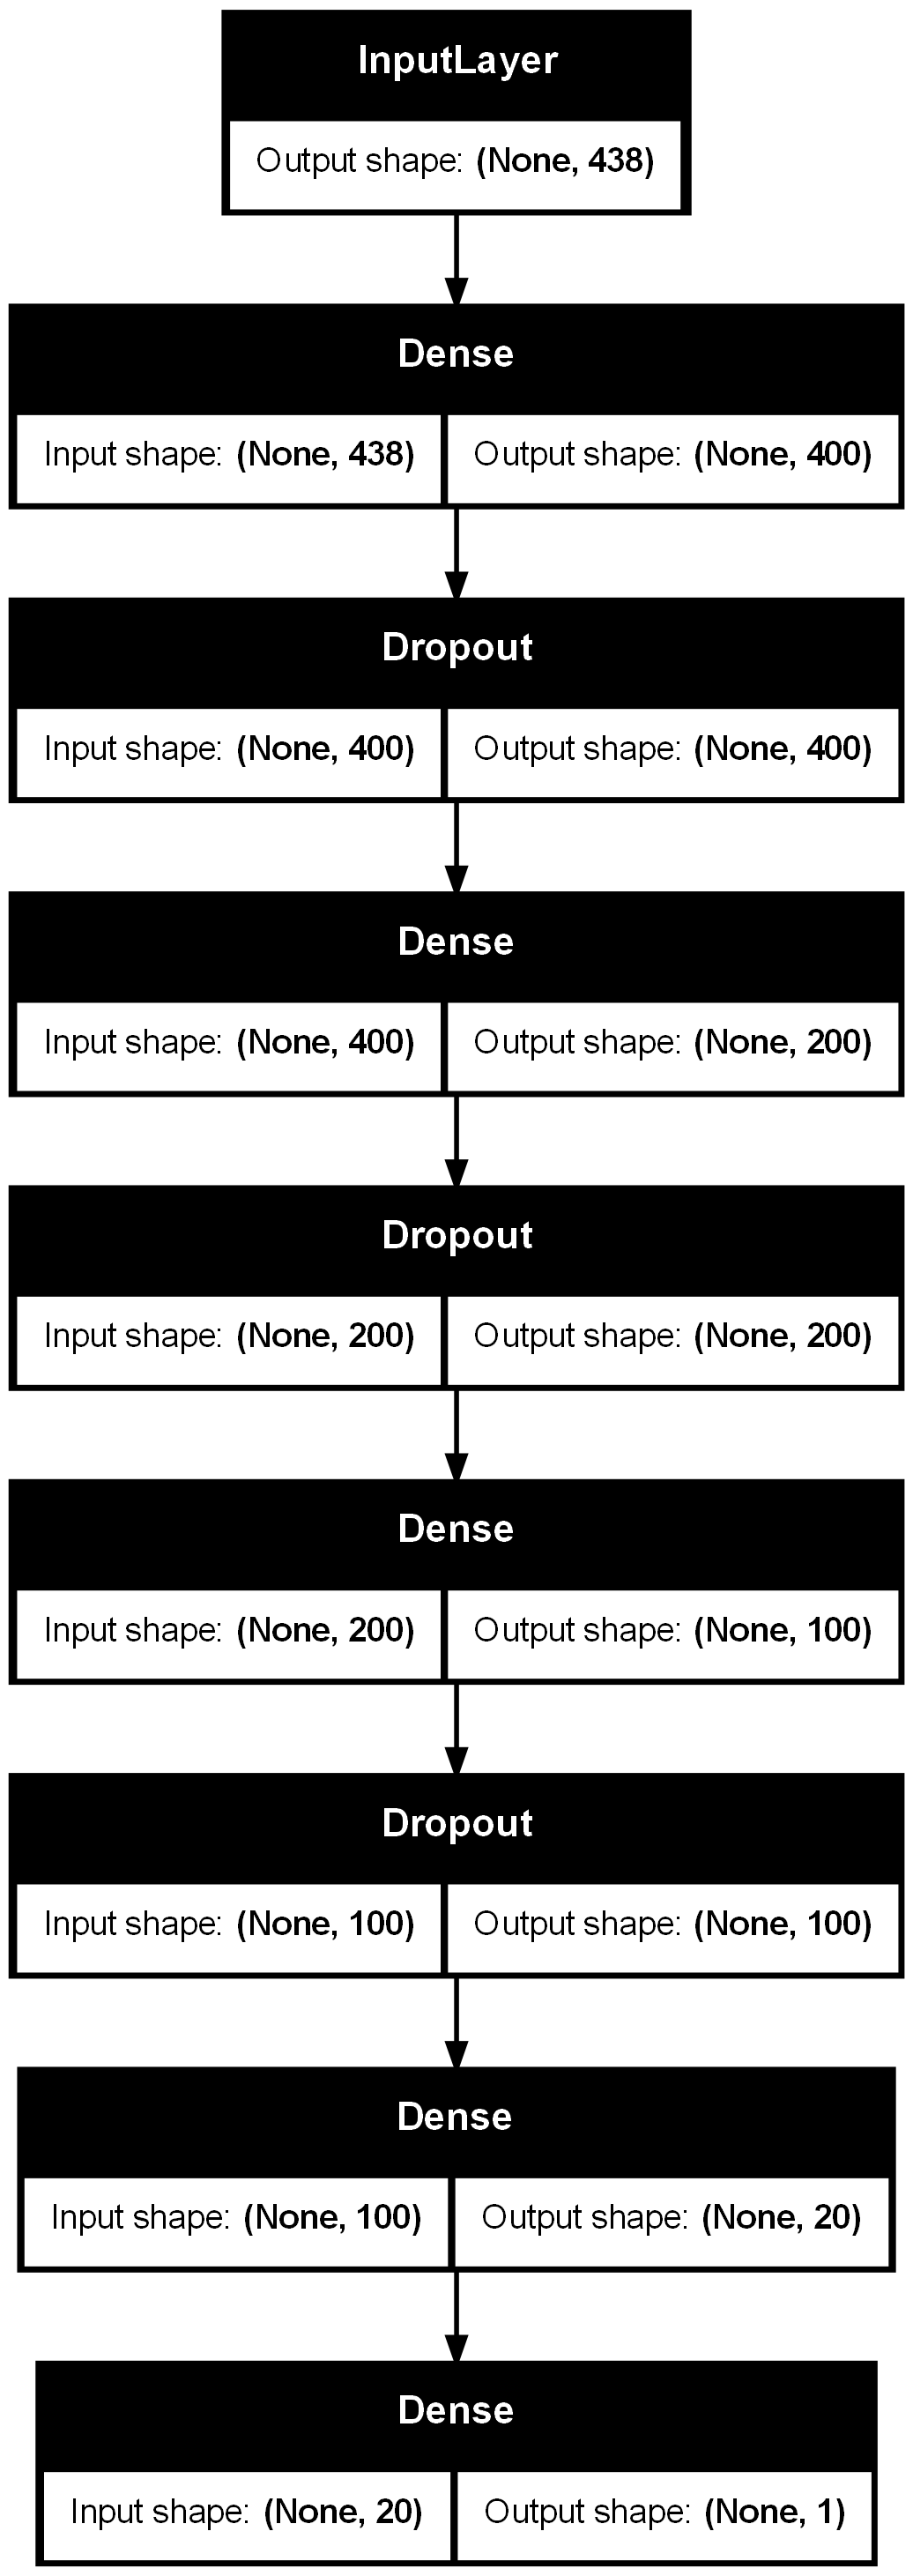

In [179]:
keras.utils.plot_model(model, show_shapes = True)

In [161]:
model.compile(
    loss = keras.losses.Huber(delta=1.0),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.R2Score],
)

history = model.fit(X_train, y_train, batch_size = 64, epochs=100, validation_split=.2)

scores = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 188581.8906 - r2_score: -0.5798 - val_loss: 156182.8438 - val_r2_score: -0.7862
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 192530.2188 - r2_score: -0.3951 - val_loss: 155310.9375 - val_r2_score: -0.7772
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 184739.6719 - r2_score: -0.4435 - val_loss: 152595.8438 - val_r2_score: -0.7496
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 186106.2188 - r2_score: -0.4420 - val_loss: 146817.2656 - val_r2_score: -0.6923
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 183446.7812 - r2_score: -0.4074 - val_loss: 136632.5781 - val_r2_score: -0.5964
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156031.8438 - r2_score: -0.4211 - val_loss: 121812.7578 - val_r2_score: -0.4604
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 160038.6719 - r2_score: -0.3023 - val_loss: 108553.2812 - val_r2_score: -0.3183
Epoch 8/100
13/13 ━━━━━━━━

### Classification Model

In [199]:
X = clean_data.drop("nation", axis = 1)
X = ct.fit_transform(X)
y = clean_data["nation"]
y = preprocessing.LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.25, random_state=1)

In [211]:
#construct the model
inputs = keras.Input(shape=(438,))
x = layers.Dense(400, activation = 'relu')(inputs)
x = layers.Dropout(rate=.1)(x)
x = layers.Dense(200, activation = "relu")(x)
x = layers.Dropout(rate = .1)(x)
x = layers.Dense(100, activation = "relu")(x)
x = layers.Dropout(rate = .1)(x)
x = layers.Dense(50, activation = "relu")(x)
outputs = layers.Dense(17, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="wine_model")

In [213]:
model.summary()

Model: "wine_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 438)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 400)                 │         175,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 200)                 │          80,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 17)                  │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,817 (1.08 MB)

 Trainable params: 281,817 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

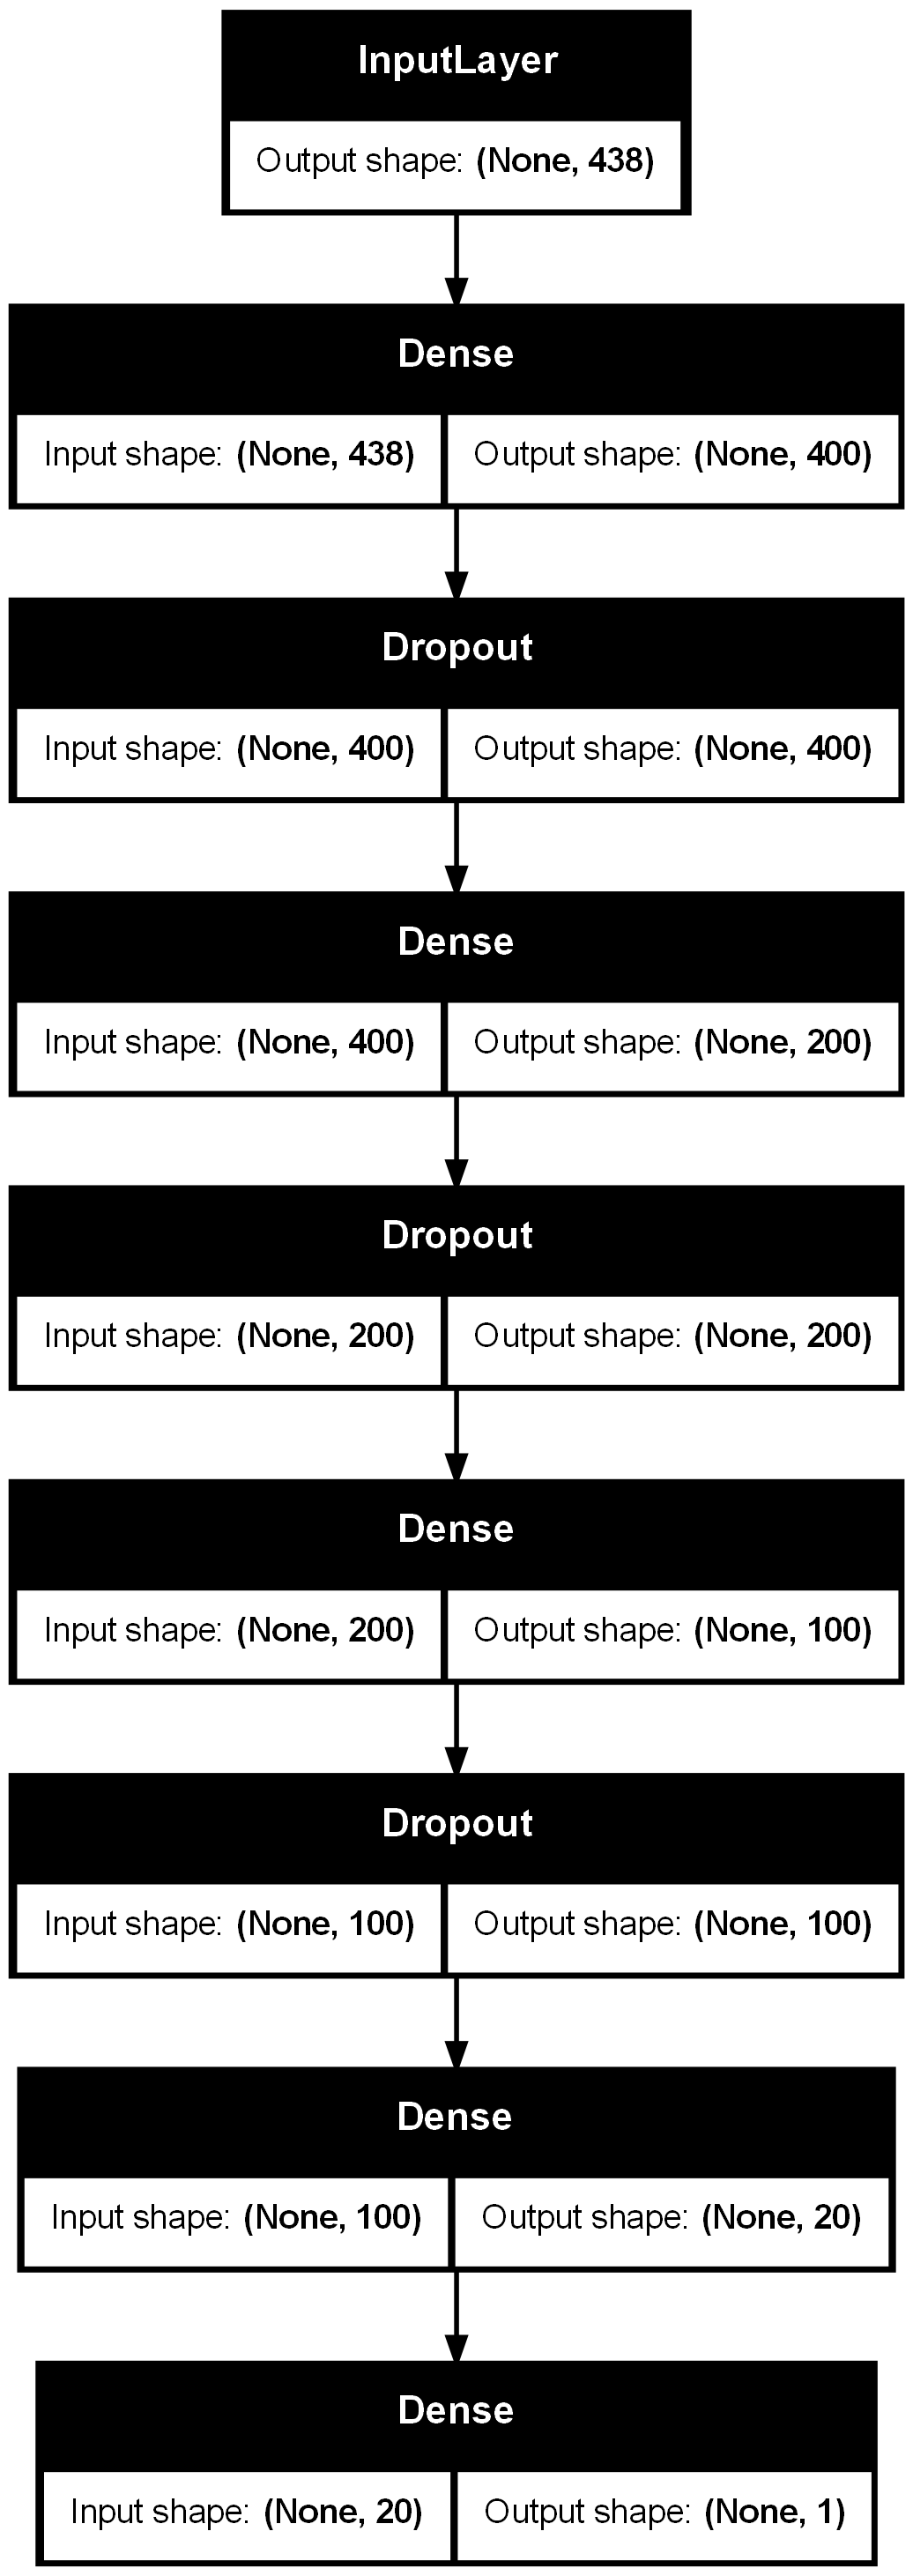

In [183]:
keras.utils.plot_model(model, show_shapes = True)

In [215]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.categorical_accuracy],
)

history = model.fit(X_train, y_train, batch_size = 64, epochs=100, validation_split=.2)

scores = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.0223 - loss: 2.5024 - val_categorical_accuracy: 0.0000e+00 - val_loss: 1.4150
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.0135 - loss: 1.1161 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.8817
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.0030 - loss: 0.6396 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.5722
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.0812 - loss: 0.3876 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.4094
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.0593 - loss: 0.2488 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.3323
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.0388 - loss: 0.1718 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.3047
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accu